In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Problem Statement (taken from problem website)

Description
Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.
Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Goal: targeted marketing campaign for personal loans w/ a conversion rate over 9.6%

Dependant Variable = Personal_Loan

## Over All Analysis: 
## Business Insights & Objectives

* Using a pruned decsion tree we can predict with a roughly 95% accuracy and similar recall if someone will take out a loan. This will allow for very effective targeting
* Education, Income and Family are our most important variables for predicting who will take out a personal loan
* Experience, Securities Account, Online and CCD are not as important
* The largest audience for the loan will be people with more education and larger families

In [2]:
df = pd.read_csv("Loan_Modelling.csv")

## EDA

In [3]:
df.shape

(5000, 14)

In [4]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
#looking to see how many zip codes our customers are in, location data might help with targeting
print(df["ZIPCode"].nunique())

467


In [8]:
#mortage is interesting in that 101 is the 75% and the mean is 56.498800, this should mean most customers dont have a mortgage, lets look at how many unique values are in this column
print(df["Mortgage"].nunique())

347


In [9]:
#checking for duplicate data
df.duplicated().sum()

0

In [10]:
#checking for duplicate data
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
#dropping the ID column as its redudant with the index
df = df.drop(["ID"], axis=1)

In [12]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [13]:
df['Experience'].loc[df["Experience"] < 0].sum()

-75

In [14]:
df.loc[df["Experience"] < 0].sample(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
576,25,-1,48,92870,3,0.3,3,0,0,0,0,0,1
3425,23,-1,12,91605,4,1.0,1,90,0,0,0,1,0
3157,23,-1,13,94720,4,1.0,1,84,0,0,0,1,0
4411,23,-2,75,90291,2,1.8,2,0,0,0,0,1,1
2545,25,-1,39,94720,3,2.4,2,0,0,0,0,1,0


In [15]:
#Several rows in the Experience field seem to have a leading negative sign, most likely data misentry lets remove
df["Experience"].replace(-1, 1, inplace=True)
df["Experience"].replace(-2, 2, inplace=True)
df["Experience"].replace(-3, 3, inplace=True)

#lets double check to make sure we got them all
df['Experience'].loc[df["Experience"] < 0].sum()

0

In [16]:
#convert categroical columns from int64 to categories
convert = ['Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
df[convert] = df[convert].astype('category')

In [17]:
#checking to make sure the changes worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   int64   
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(6)
memory usage: 303.6 KB


In [18]:
df.describe(include=['category']).T

,count,unique,top,freq
Education,5000,3,1,2096
Personal_Loan,5000,2,0,4520
Securities_Account,5000,2,0,4478
CD_Account,5000,2,0,4698
Online,5000,2,1,2984
CreditCard,5000,2,0,3530


In [19]:
# Looking at value counts for our categorical fields
for i in convert:
    print(i, "-" * 10)
    print(df[i].value_counts())
    print("")

Education ----------
1    2096
3    1501
2    1403
Name: Education, dtype: int64

Personal_Loan ----------
0    4520
1     480
Name: Personal_Loan, dtype: int64

Securities_Account ----------
0    4478
1     522
Name: Securities_Account, dtype: int64

CD_Account ----------
0    4698
1     302
Name: CD_Account, dtype: int64

Online ----------
1    2984
0    2016
Name: Online, dtype: int64

CreditCard ----------
0    3530
1    1470
Name: CreditCard, dtype: int64



In [20]:
# Lets look at unique counts for all int columns
int_cols = list(df.select_dtypes(['int64']).columns)

for i in int_cols:
    print('Unique', i, ': ', df[i].nunique())

Unique Age :  45
Unique Experience :  44
Unique Income :  162
Unique ZIPCode :  467
Unique Family :  4
Unique Mortgage :  347


### Observations

* There are a number of columns that should be categorical instead of int64
    * Education 
    * Personal_Loan 
    * Securities_Acount 
    * CD_Account 
    * Online 
    * Credit Card

#### Observations on Continous Data
* ID: Mimics the index - DROP  
* Age: Average age is 54, 50% of customers are within a 20 year range of 35-55  
* Experience: the min here -3, will need to address those rows. Will change negative values to 0
* Income: Average income is roughly 74k, 50% of customers are between 39k - 98k
* Zip Code: There are a lot of zip codes
* Family: The max number of dependants is 4, 75% of people have 3 or less
* CCAvg: 75% of people spend less than 2.5k on their CCDs every month
* Mortgage: 75% of customers have mortgages under 101k, but the 50 and 25% quartiles are 0. Looking at the the data only roughly 31% of customers have a mortgage

#### Observations on Categorical Data
* Education -----------------------
    * Undergrad = 2096 or 41.92%
    * Graduate = 1501 or 30.02
    * Advanced / Professional = 1403 or 28.06% 
    <br/><br/>
* Personal Loans: 480 or 9.6% of customers accepted a loan offer during the last campaign
* Securities Account: 522 or 10.44% of customers have a securities account
* CD Account: 302 or 6.04% of customers have a Account
* Online: 2016 or 40.32% of customers do not bank online
* Credit Card: 1470 or 29.4% of customers have a credit card

### Reusable Functions
reusing provided function for generating graphs


In [21]:
# reusing provided function for generating graphs

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [22]:
# reusing provided function for generating graphs
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [23]:
# reusing provided function for generating graphs

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Univariate Analysis

### Analysis Numerical Features

#### Age Graphs

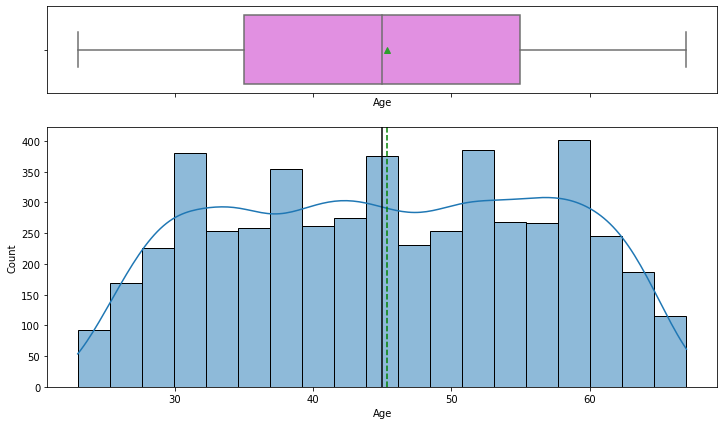

In [24]:
histogram_boxplot(df, "Age", kde=True)

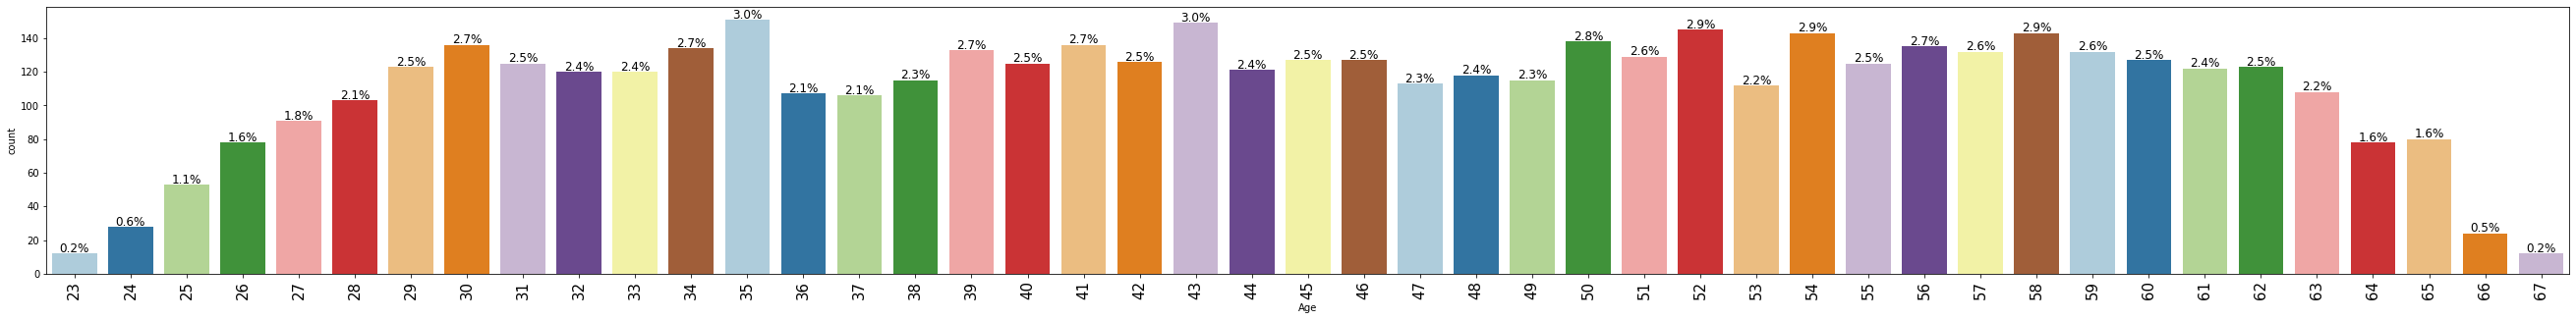

In [25]:
labeled_barplot(df, "Age", perc=True)

* distribution is normal for the most part
* age range of 35-65 might be idea for targeting

#### Experience Graphs

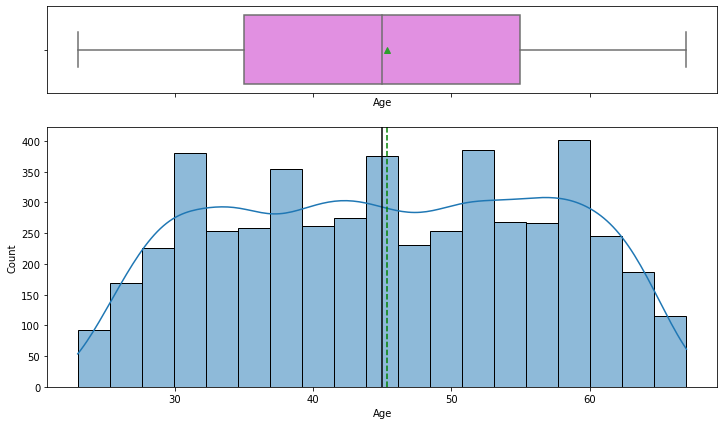

In [26]:
histogram_boxplot(df, "Age", kde=True)

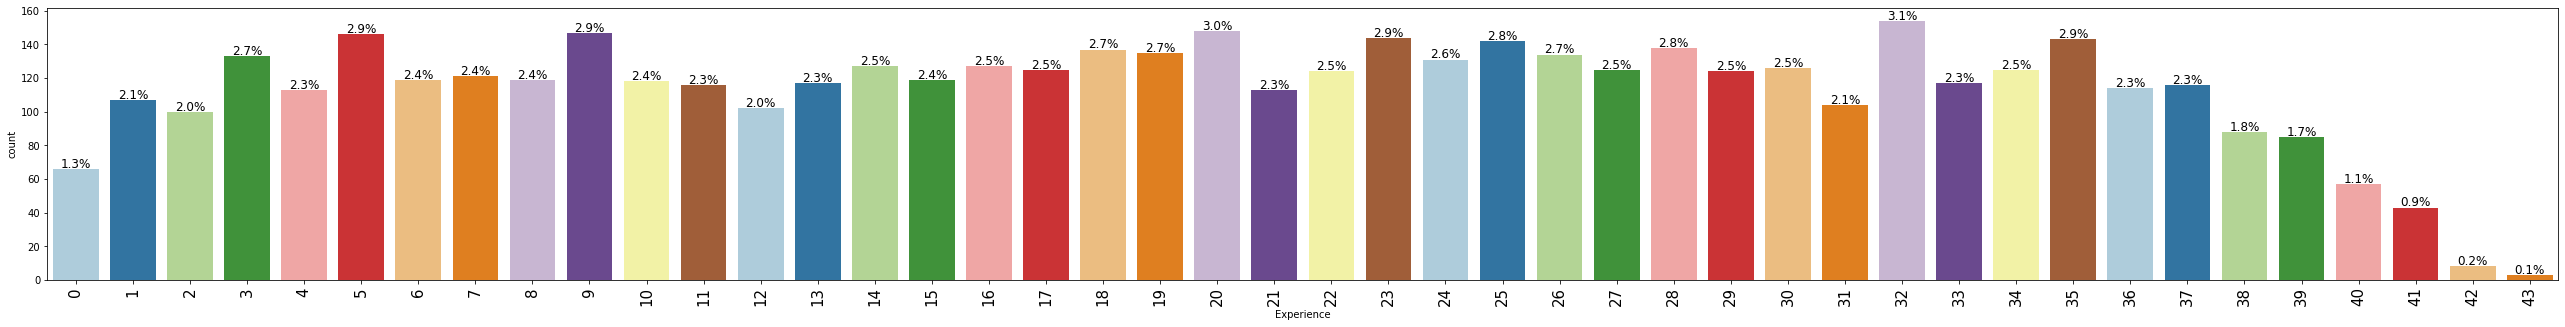

In [27]:
labeled_barplot(df, "Experience", perc=True)

* age and experience look pretty closely related

#### Income Graphs

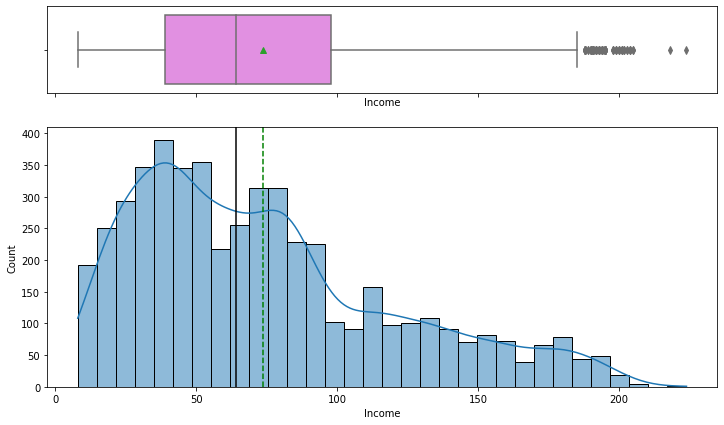

In [28]:
histogram_boxplot(df, "Income", kde=True)

* Half of customers make less than 64K a year
* the high end is more than 3 times the median value
* distribution is skewed pretty heaviliy to the right, things drop off pretty heavily after the 90k mark

#### Family Graphs

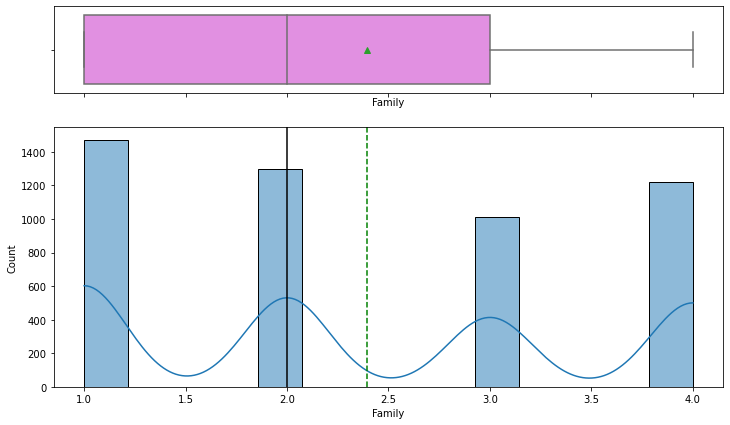

In [29]:
histogram_boxplot(df, "Family", kde=True)

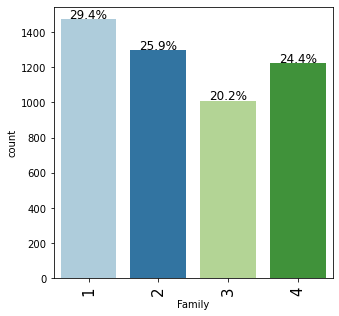

In [30]:
labeled_barplot(df, "Family", perc=True)

* There is not a major difference in family size among members, bivariate analysis will be interesting to compare family vs other features

#### Credit Card Average Graphs

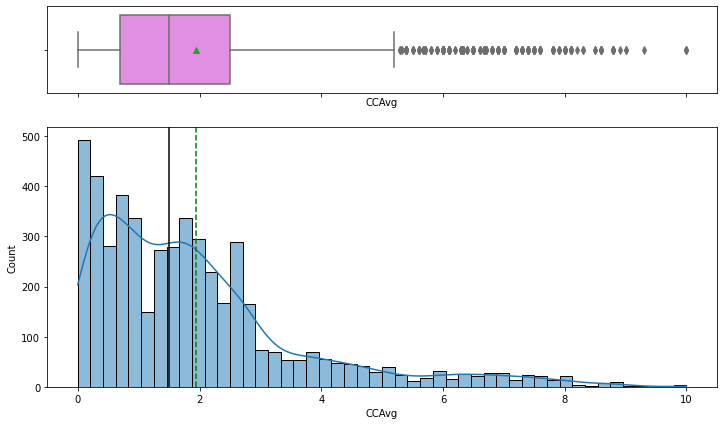

In [31]:
histogram_boxplot(df, "CCAvg", kde=True)

* very heavy right skew with a lot of outliers on the high end
* Most customers have less than 2k spend on ccds per month

#### Mortgage Graphs

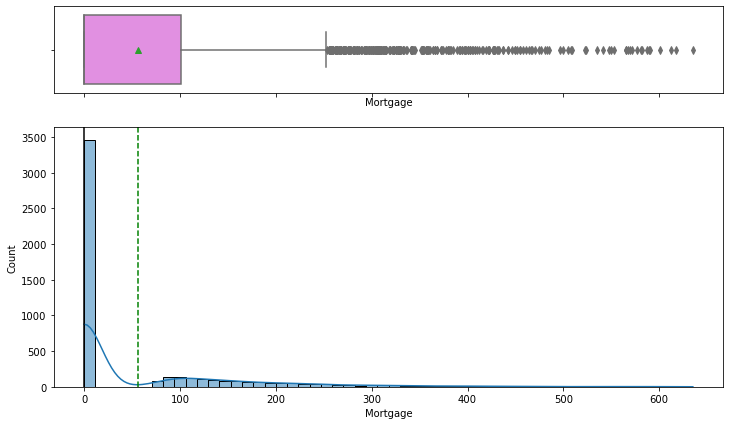

In [32]:
histogram_boxplot(df, "Mortgage", kde=True)

* The data shows lots of outliers, this is a misrepresentation imo since most customers do not have a mortgage. 
* I wonder if binning would make more sense here
* mortgages start at 101 and raise up to just over 600k

### Graphs on Categorical Data

#### Education Graphs

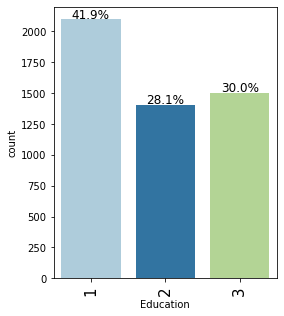

In [33]:
labeled_barplot(df, "Education", perc=True)

Observations:  
    * Most customers have an undergrad degree

#### Personal_Loan Graphs

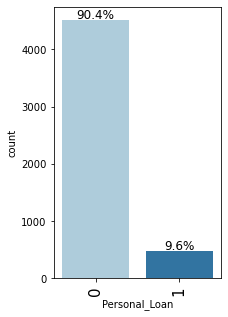

In [34]:
labeled_barplot(df, "Personal_Loan", perc=True)

Observations:  
    * less than 10% of customers have a personal loan, i wonder what national averages are and if this is good

#### Securities_Account Graphs

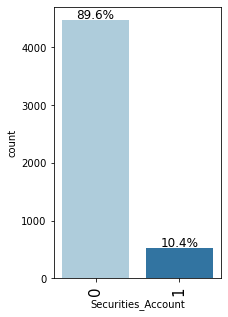

In [35]:
labeled_barplot(df, "Securities_Account", perc=True)

Observations:  
    * Just over 10% of customers have a securities account, just higher than the amount of customers with a personal loan

#### CD_Account Graphs

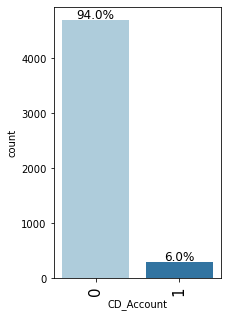

In [36]:
labeled_barplot(df, "CD_Account", perc=True)

Observations:  
    * Very few customers have cds

#### Online Graphs

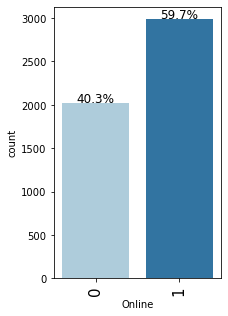

In [37]:
labeled_barplot(df, "Online", perc=True)

Observations:
    * most customers use online banking, i think this is an older data set I would expect this to be much higher today

#### CreditCard Graphs

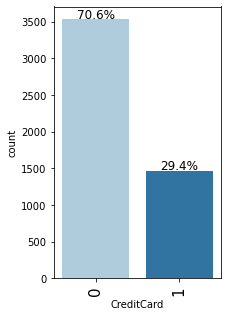

In [38]:
labeled_barplot(df, "CreditCard", perc=True)

Observations:  
    * Most customers have a ccd

### Bivariate Analysis

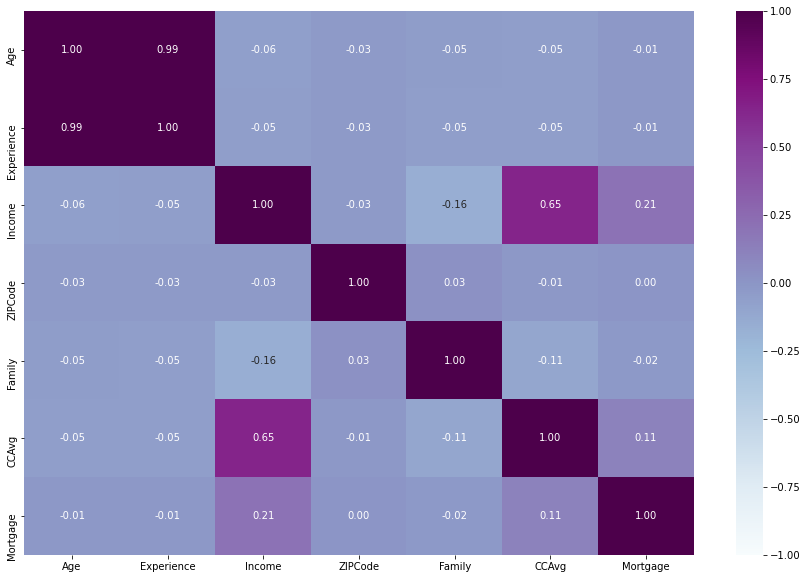

In [39]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="BuPu")
plt.show()

In [40]:
df.corr()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage
Age,1.000000,0.993991,-0.055269,-0.030530,-0.046418,-0.052012,-0.012539
Experience,0.993991,1.000000,-0.046876,-0.030837,-0.051851,-0.049738,-0.011097
Income,-0.055269,-0.046876,1.000000,-0.030709,-0.157501,0.645984,0.206806
ZIPCode,-0.030530,-0.030837,-0.030709,1.000000,0.027512,-0.012188,0.003614
Family,-0.046418,-0.051851,-0.157501,0.027512,1.000000,-0.109275,-0.020445
CCAvg,-0.052012,-0.049738,0.645984,-0.012188,-0.109275,1.000000,0.109905
Mortgage,-0.012539,-0.011097,0.206806,0.003614,-0.020445,0.109905,1.000000


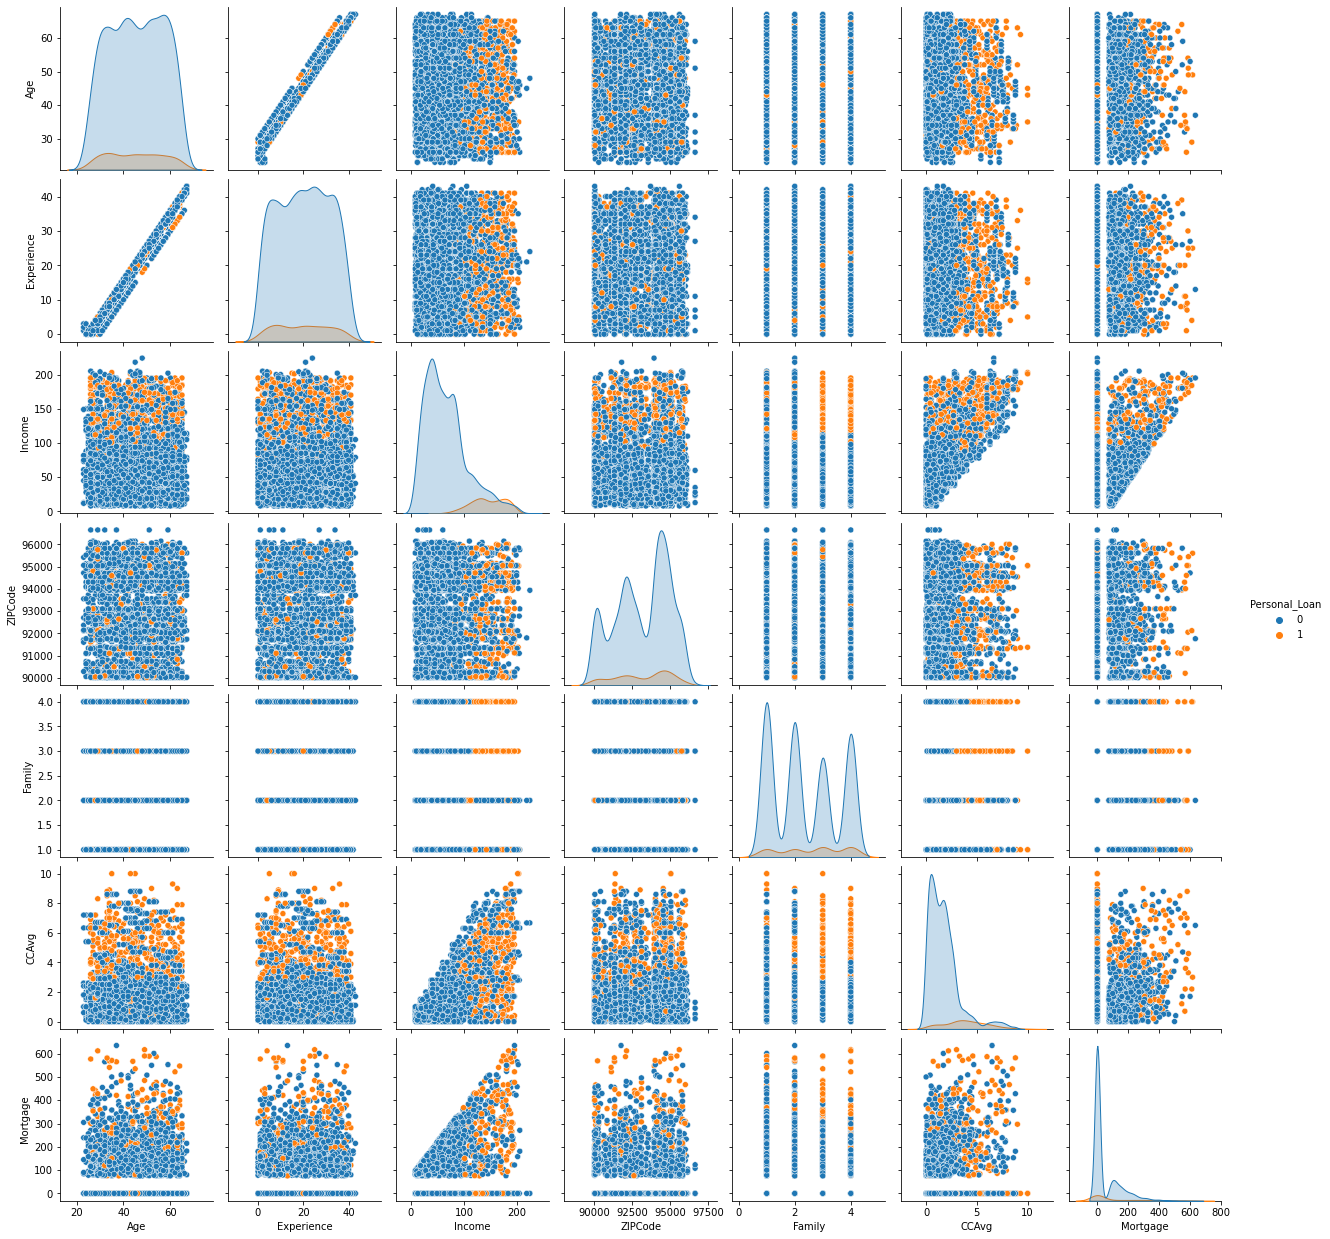

In [41]:
sns.pairplot(data=df, hue="Personal_Loan")
plt.show()

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


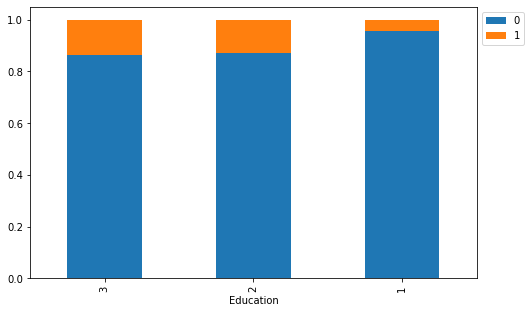

Personal_Loan     0    1   All
Personal_Loan                 
1                 0  480   480
All            4520  480  5000
0              4520    0  4520
------------------------------------------------------------------------------------------------------------------------


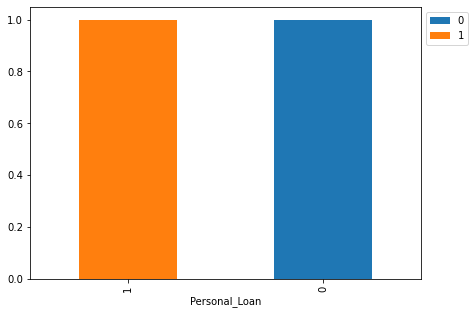

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


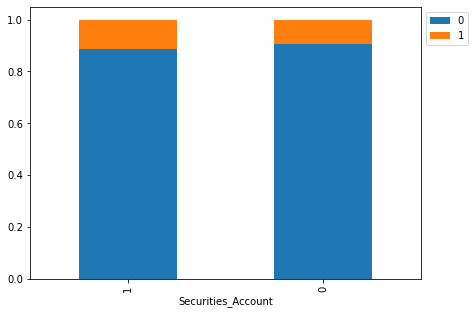

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


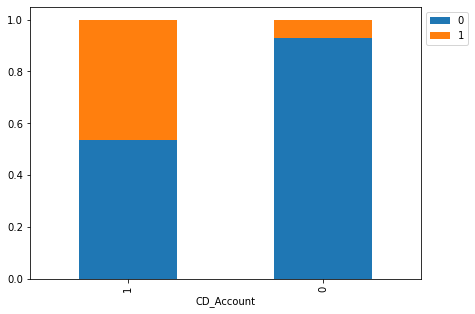

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


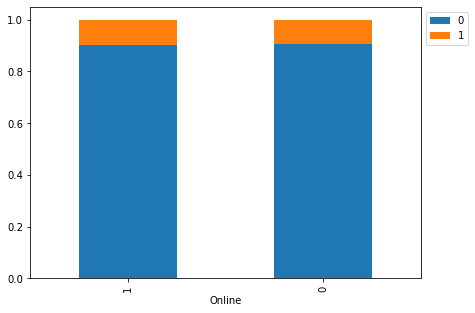

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


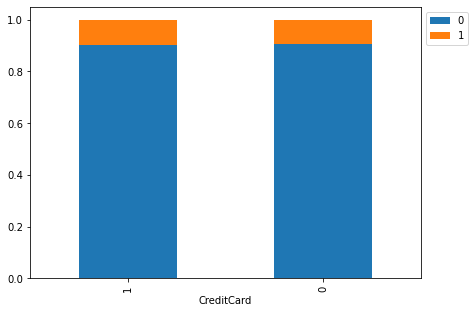

In [42]:
for i in convert:
    stacked_barplot(df, i, "Personal_Loan")

#### Early Observations
* Experience and Age are very closely correlated as intially thought
* Higher income earners use their ccds more
* In relation to income it appears higher end earners are more likely to take out a personal loan vs lower income
* Older more expeienced people with a higher income and Higher CCD Averages are more likely to take out a personal loan
* CD Accounts seem to be a good indicator of Personal Loans as well

In [43]:
# drop dependant variable
X = df.drop(['Personal_Loan', 'Experience'], axis = 1) #dropping experience since its 99% correlated with age its redundant
Y = df['Personal_Loan']

#create dummies for zip code and education as categorical variables with more than binary entires
X = pd.get_dummies(X, columns=['ZIPCode', 'Education'], drop_first=True)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

In [44]:
print("Rows in train data:", X_train.shape[0])
print("Rows in test data:", X_test.shape[0])

Rows in train data: 3500
Rows in test data: 1500


In [45]:
print(f"The data set has: {df.shape[0]}, classes in total")
print()
print("Number of Classes in training set:")
print(y_train.value_counts())
print()
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print()
print("Classes in test set:")
print(y_test.value_counts())
print()
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

The data set has: 5000, classes in total

Number of Classes in training set:
0    3177
1     323
Name: Personal_Loan, dtype: int64

Percentage of classes in training set:
0    0.907714
1    0.092286
Name: Personal_Loan, dtype: float64

Classes in test set:
0    1343
1     157
Name: Personal_Loan, dtype: int64

Percentage of classes in test set:
0    0.895333
1    0.104667
Name: Personal_Loan, dtype: float64


### Logistic Regression Functions

In [46]:
# reusing provided function for generating graphs
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [64]:
# reusing provided function for generating graphs
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [48]:
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

In [49]:
odds = lg.coef_[0]
pd.DataFrame(odds, X_train.columns, columns=["coef"]).T

,Age,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_90007,ZIPCode_90009,ZIPCode_90011,ZIPCode_90016,ZIPCode_90018,ZIPCode_90019,ZIPCode_90024,ZIPCode_90025,ZIPCode_90027,ZIPCode_90028,ZIPCode_90029,ZIPCode_90032,ZIPCode_90033,ZIPCode_90034,ZIPCode_90035,ZIPCode_90036,ZIPCode_90037,ZIPCode_90041,ZIPCode_90044,ZIPCode_90045,ZIPCode_90048,ZIPCode_90049,ZIPCode_90057,ZIPCode_90058,ZIPCode_90059,ZIPCode_90064,ZIPCode_90065,ZIPCode_90066,ZIPCode_90068,ZIPCode_90071,ZIPCode_90073,ZIPCode_90086,ZIPCode_90089,ZIPCode_90095,ZIPCode_90210,ZIPCode_90212,ZIPCode_90230,ZIPCode_90232,ZIPCode_90245,ZIPCode_90250,ZIPCode_90254,ZIPCode_90266,ZIPCode_90272,ZIPCode_90274,ZIPCode_90275,ZIPCode_90277,ZIPCode_90280,ZIPCode_90291,ZIPCode_90304,ZIPCode_90401,ZIPCode_90404,ZIPCode_90405,ZIPCode_90502,ZIPCode_90503,ZIPCode_90504,ZIPCode_90505,ZIPCode_90509,ZIPCode_90601,ZIPCode_90623,ZIPCode_90630,ZIPCode_90638,ZIPCode_90639,ZIPCode_90640,ZIPCode_90650,ZIPCode_90717,ZIPCode_90720,ZIPCode_90740,ZIPCode_90745,ZIPCode_90747,ZIPCode_90755,ZIPCode_90813,ZIPCode_90840,ZIPCode_91006,ZIPCode_91007,ZIPCode_91016,ZIPCode_91024,ZIPCode_91030,ZIPCode_91040,ZIPCode_91101,ZIPCode_91103,ZIPCode_91105,ZIPCode_91107,ZIPCode_91109,ZIPCode_91116,ZIPCode_91125,ZIPCode_91129,ZIPCode_91203,ZIPCode_91207,ZIPCode_91301,ZIPCode_91302,ZIPCode_91304,ZIPCode_91311,ZIPCode_91320,ZIPCode_91326,ZIPCode_91330,ZIPCode_91335,ZIPCode_91342,ZIPCode_91343,ZIPCode_91345,ZIPCode_91355,ZIPCode_91360,ZIPCode_91361,ZIPCode_91365,ZIPCode_91367,ZIPCode_91380,ZIPCode_91401,ZIPCode_91423,ZIPCode_91604,ZIPCode_91605,ZIPCode_91614,ZIPCode_91706,ZIPCode_91709,ZIPCode_91710,ZIPCode_91711,ZIPCode_91730,ZIPCode_91741,ZIPCode_91745,ZIPCode_91754,ZIPCode_91763,ZIPCode_91765,ZIPCode_91768,ZIPCode_91770,ZIPCode_91773,ZIPCode_91775,ZIPCode_91784,ZIPCode_91791,ZIPCode_91801,ZIPCode_91902,ZIPCode_91910,ZIPCode_91911,ZIPCode_91941,ZIPCode_91942,ZIPCode_91950,ZIPCode_92007,ZIPCode_92008,ZIPCode_92009,ZIPCode_92024,ZIPCode_92028,ZIPCode_92029,ZIPCode_92037,ZIPCode_92038,ZIPCode_92054,ZIPCode_92056,ZIPCode_92064,ZIPCode_92068,ZIPCode_92069,ZIPCode_92084,ZIPCode_92093,ZIPCode_92096,ZIPCode_92101,ZIPCode_92103,ZIPCode_92104,ZIPCode_92106,ZIPCode_92109,ZIPCode_92110,ZIPCode_92115,ZIPCode_92116,ZIPCode_92120,ZIPCode_92121,ZIPCode_92122,ZIPCode_92123,ZIPCode_92124,ZIPCode_92126,ZIPCode_92129,ZIPCode_92130,ZIPCode_92131,ZIPCode_92152,ZIPCode_92154,ZIPCode_92161,ZIPCode_92173,ZIPCode_92177,ZIPCode_92182,ZIPCode_92192,ZIPCode_92220,ZIPCode_92251,ZIPCode_92325,ZIPCode_92333,ZIPCode_92346,ZIPCode_92350,ZIPCode_92354,ZIPCode_92373,ZIPCode_92374,ZIPCode_92399,ZIPCode_92407,ZIPCode_92507,ZIPCode_92518,ZIPCode_92521,ZIPCode_92606,ZIPCode_92612,ZIPCode_92614,ZIPCode_92624,ZIPCode_92626,ZIPCode_92630,ZIPCode_92634,ZIPCode_92646,ZIPCode_92647,ZIPCode_92648,ZIPCode_92653,ZIPCode_92660,ZIPCode_92661,ZIPCode_92672,ZIPCode_92673,ZIPCode_92675,ZIPCode_92677,ZIPCode_92691,ZIPCode_92692,ZIPCode_92694,ZIPCode_92697,ZIPCode_92703,ZIPCode_92704,ZIPCode_92705,ZIPCode_92709,ZIPCode_92717,ZIPCode_92735,ZIPCode_92780,ZIPCode_92806,ZIPCode_92807,ZIPCode_92821,ZIPCode_92831,ZIPCode_92833,ZIPCode_92834,ZIPCode_92835,ZIPCode_92843,ZIPCode_92866,ZIPCode_92867,ZIPCode_92868,ZIPCode_92870,ZIPCode_92886,ZIPCode_93003,ZIPCode_93009,ZIPCode_93010,ZIPCode_93014,ZIPCode_93022,ZIPCode_93023,ZIPCode_93033,ZIPCode_93063,ZIPCode_93065,ZIPCode_93077,ZIPCode_93101,ZIPCode_93105,ZIPCode_93106,ZIPCode_93107,ZIPCode_93108,ZIPCode_93109,ZIPCode_93111,ZIPCode_93117,ZIPCode_93118,ZIPCode_93302,ZIPCode_93305,ZIPCode_93311,ZIPCode_93401,ZIPCode_93403,ZIPCode_93407,ZIPCode_93437,ZIPCode_93460,ZIPCode_93524,ZIPCode_93555,ZIPCode_93561,ZIPCode_93611,ZIPCode_93657,ZIPCode_93711,ZIPCode_93720,ZIPCode_93727,ZIPCode_93907,ZIPCode_93933,ZIPCode_93940,ZIPCode_93943,ZIPCode_93950,ZIPCode_93955,ZIPCode_94002,ZIPCode_94005,ZIPCode_94010,ZIPCode_94015,ZIPCode_94019,ZIPCode_94022,ZIPCode_94024,ZIPCode_94025,ZIPCode_94028,ZIPCode_94035,ZIPCode_9404

#### Observations on Coefficients

* These features are positive, to varying degrees, and will help better target customers more likely to convert from add to loan
    * Age
    * Income
    * Family
    * CCD average
    * CD Account
    * Education
    * Some Zip Codes
* These features are negative, to varying degrees, and will hurt targeting customers more likely to convert from add to loan*
    * Securties Account
    * Credit Card
    * Online
    * Some Zip Codes
    
Zip codes have a degree of variation

In [59]:
odds = np.exp(lg.coef_[0])  # Turn coefficients into odds
perc = (np.exp(lg.coef_[0]) - 1) * 100  # What is the % Change

pd.DataFrame({"Odds": odds, "Change %": perc}, index=X_train.columns).T

,Age,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_90007,ZIPCode_90009,ZIPCode_90011,ZIPCode_90016,ZIPCode_90018,ZIPCode_90019,ZIPCode_90024,ZIPCode_90025,ZIPCode_90027,ZIPCode_90028,ZIPCode_90029,ZIPCode_90032,ZIPCode_90033,ZIPCode_90034,ZIPCode_90035,ZIPCode_90036,ZIPCode_90037,ZIPCode_90041,ZIPCode_90044,ZIPCode_90045,ZIPCode_90048,ZIPCode_90049,ZIPCode_90057,ZIPCode_90058,ZIPCode_90059,ZIPCode_90064,ZIPCode_90065,ZIPCode_90066,ZIPCode_90068,ZIPCode_90071,ZIPCode_90073,ZIPCode_90086,ZIPCode_90089,ZIPCode_90095,ZIPCode_90210,ZIPCode_90212,ZIPCode_90230,ZIPCode_90232,ZIPCode_90245,ZIPCode_90250,ZIPCode_90254,ZIPCode_90266,ZIPCode_90272,ZIPCode_90274,ZIPCode_90275,ZIPCode_90277,ZIPCode_90280,ZIPCode_90291,ZIPCode_90304,ZIPCode_90401,ZIPCode_90404,ZIPCode_90405,ZIPCode_90502,ZIPCode_90503,ZIPCode_90504,ZIPCode_90505,ZIPCode_90509,ZIPCode_90601,ZIPCode_90623,ZIPCode_90630,ZIPCode_90638,ZIPCode_90639,ZIPCode_90640,ZIPCode_90650,ZIPCode_90717,ZIPCode_90720,ZIPCode_90740,ZIPCode_90745,ZIPCode_90747,ZIPCode_90755,ZIPCode_90813,ZIPCode_90840,ZIPCode_91006,ZIPCode_91007,ZIPCode_91016,ZIPCode_91024,ZIPCode_91030,ZIPCode_91040,ZIPCode_91101,ZIPCode_91103,ZIPCode_91105,ZIPCode_91107,ZIPCode_91109,ZIPCode_91116,ZIPCode_91125,ZIPCode_91129,ZIPCode_91203,ZIPCode_91207,ZIPCode_91301,ZIPCode_91302,ZIPCode_91304,ZIPCode_91311,ZIPCode_91320,ZIPCode_91326,ZIPCode_91330,ZIPCode_91335,ZIPCode_91342,ZIPCode_91343,ZIPCode_91345,ZIPCode_91355,ZIPCode_91360,ZIPCode_91361,ZIPCode_91365,ZIPCode_91367,ZIPCode_91380,ZIPCode_91401,ZIPCode_91423,ZIPCode_91604,ZIPCode_91605,ZIPCode_91614,ZIPCode_91706,ZIPCode_91709,ZIPCode_91710,ZIPCode_91711,ZIPCode_91730,ZIPCode_91741,ZIPCode_91745,ZIPCode_91754,ZIPCode_91763,ZIPCode_91765,ZIPCode_91768,ZIPCode_91770,ZIPCode_91773,ZIPCode_91775,ZIPCode_91784,ZIPCode_91791,ZIPCode_91801,ZIPCode_91902,ZIPCode_91910,ZIPCode_91911,ZIPCode_91941,ZIPCode_91942,ZIPCode_91950,ZIPCode_92007,ZIPCode_92008,ZIPCode_92009,ZIPCode_92024,ZIPCode_92028,ZIPCode_92029,ZIPCode_92037,ZIPCode_92038,ZIPCode_92054,ZIPCode_92056,ZIPCode_92064,ZIPCode_92068,ZIPCode_92069,ZIPCode_92084,ZIPCode_92093,ZIPCode_92096,ZIPCode_92101,ZIPCode_92103,ZIPCode_92104,ZIPCode_92106,ZIPCode_92109,ZIPCode_92110,ZIPCode_92115,ZIPCode_92116,ZIPCode_92120,ZIPCode_92121,ZIPCode_92122,ZIPCode_92123,ZIPCode_92124,ZIPCode_92126,ZIPCode_92129,ZIPCode_92130,ZIPCode_92131,ZIPCode_92152,ZIPCode_92154,ZIPCode_92161,ZIPCode_92173,ZIPCode_92177,ZIPCode_92182,ZIPCode_92192,ZIPCode_92220,ZIPCode_92251,ZIPCode_92325,ZIPCode_92333,ZIPCode_92346,ZIPCode_92350,ZIPCode_92354,ZIPCode_92373,ZIPCode_92374,ZIPCode_92399,ZIPCode_92407,ZIPCode_92507,ZIPCode_92518,ZIPCode_92521,ZIPCode_92606,ZIPCode_92612,ZIPCode_92614,ZIPCode_92624,ZIPCode_92626,ZIPCode_92630,ZIPCode_92634,ZIPCode_92646,ZIPCode_92647,ZIPCode_92648,ZIPCode_92653,ZIPCode_92660,ZIPCode_92661,ZIPCode_92672,ZIPCode_92673,ZIPCode_92675,ZIPCode_92677,ZIPCode_92691,ZIPCode_92692,ZIPCode_92694,ZIPCode_92697,ZIPCode_92703,ZIPCode_92704,ZIPCode_92705,ZIPCode_92709,ZIPCode_92717,ZIPCode_92735,ZIPCode_92780,ZIPCode_92806,ZIPCode_92807,ZIPCode_92821,ZIPCode_92831,ZIPCode_92833,ZIPCode_92834,ZIPCode_92835,ZIPCode_92843,ZIPCode_92866,ZIPCode_92867,ZIPCode_92868,ZIPCode_92870,ZIPCode_92886,ZIPCode_93003,ZIPCode_93009,ZIPCode_93010,ZIPCode_93014,ZIPCode_93022,ZIPCode_93023,ZIPCode_93033,ZIPCode_93063,ZIPCode_93065,ZIPCode_93077,ZIPCode_93101,ZIPCode_93105,ZIPCode_93106,ZIPCode_93107,ZIPCode_93108,ZIPCode_93109,ZIPCode_93111,ZIPCode_93117,ZIPCode_93118,ZIPCode_93302,ZIPCode_93305,ZIPCode_93311,ZIPCode_93401,ZIPCode_93403,ZIPCode_93407,ZIPCode_93437,ZIPCode_93460,ZIPCode_93524,ZIPCode_93555,ZIPCode_93561,ZIPCode_93611,ZIPCode_93657,ZIPCode_93711,ZIPCode_93720,ZIPCode_93727,ZIPCode_93907,ZIPCode_93933,ZIPCode_93940,ZIPCode_93943,ZIPCode_93950,ZIPCode_93955,ZIPCode_94002,ZIPCode_94005,ZIPCode_94010,ZIPCode_94015,ZIPCode_94019,ZIPCode_94022,ZIPCode_94024,ZIPCode_94025,ZIPCode_94028,ZIPCode_94035,ZIPCode_9404

Coeffiecient Observations

* Age - Increasing age by 1 unit increased the oddcs of taking out a personal loan by almost 1.2%.
* Income - Increasing income by 1 unit increases the odds of takinga a personal loan by 5.5%
* Family - Increasing family by almost 2 units increases the odd by 86%
* CCAvg - Increasing CD_Account by 1 unit increases the by 15%
* Securities_Account - Increasing the securities account by 1 decresses the odds of taking out a loan by 45%
* CD_Account - Increasing CD_Account by 23 units increases the by 2,185%

In [53]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.962857,0.671827,0.900415,0.769504


In [55]:
print("Training performance:")
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)
log_reg_model_test_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.958,0.694268,0.879032,0.775801


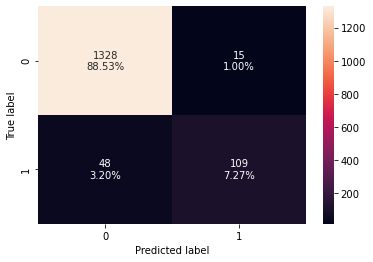

In [56]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

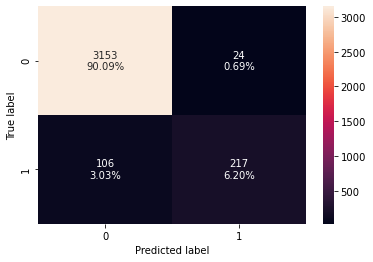

In [57]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

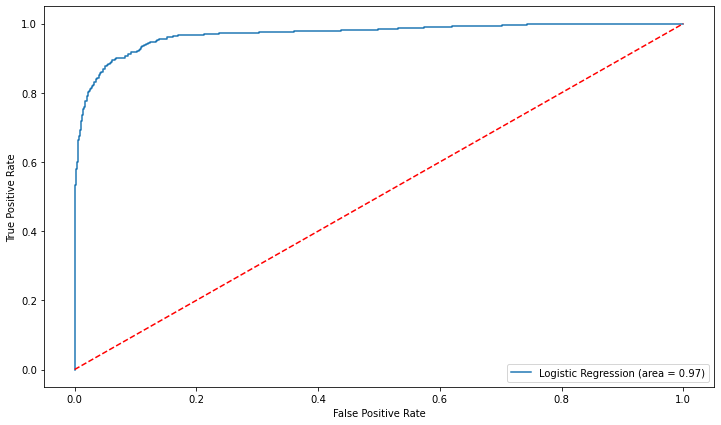

In [60]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [62]:
# Optimal threshold per the AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

opt_idx = np.argmax(tpr - fpr)
opt_ar_thres = thresholds[opt_idx]
print(opt_ar_thres)

0.1533775521621031


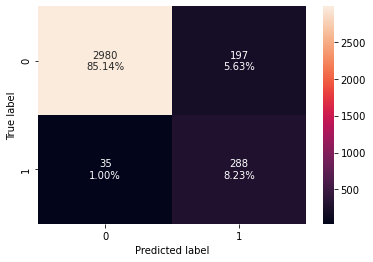

In [65]:
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train, threshold=opt_ar_thres)

In [69]:
# Checking model performance
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=opt_ar_thres
)

print("Training Performance:")
log_reg_model_train_perf

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.933714,0.891641,0.593814,0.712871


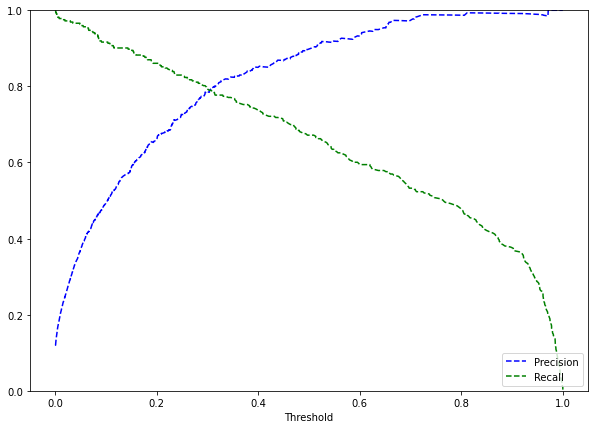

In [71]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def prec_recall_vs_tresh(precT, recalT, thresholds):
    plt.plot(thresholds, precT[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalT[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* looks like the best threshold is round 0.27

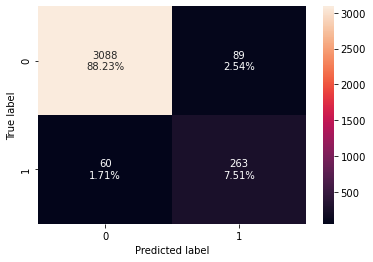

In [72]:
# creating confusion matrix

threshold = 0.27
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=threshold
)

In [77]:
# Lets compare performance metrics for the different thresholds
models_comp = pd.concat(
    [log_reg_model_train_perf.T, log_reg_model_train_perf_threshold_curve.T,], axis=1,
)
models_comp.columns = [
    "LR",
    "LR-0.27",
]

print("Training performance comparison, different thresholds:")
models_comp

Training performance comparison, different thresholds:


,LR,LR-0.27
Accuracy,0.933714,0.957429
Recall,0.891641,0.814241
Precision,0.593814,0.747159
F1,0.712871,0.779259


## Decision Trees

#### Decsion Tree Functions

In [80]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [81]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [82]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

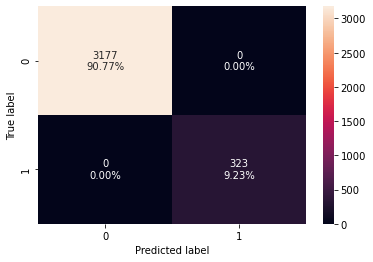

In [83]:
confusion_matrix_sklearn(model, X_train, y_train)

In [84]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [85]:
feat = X_train.columns.to_list()

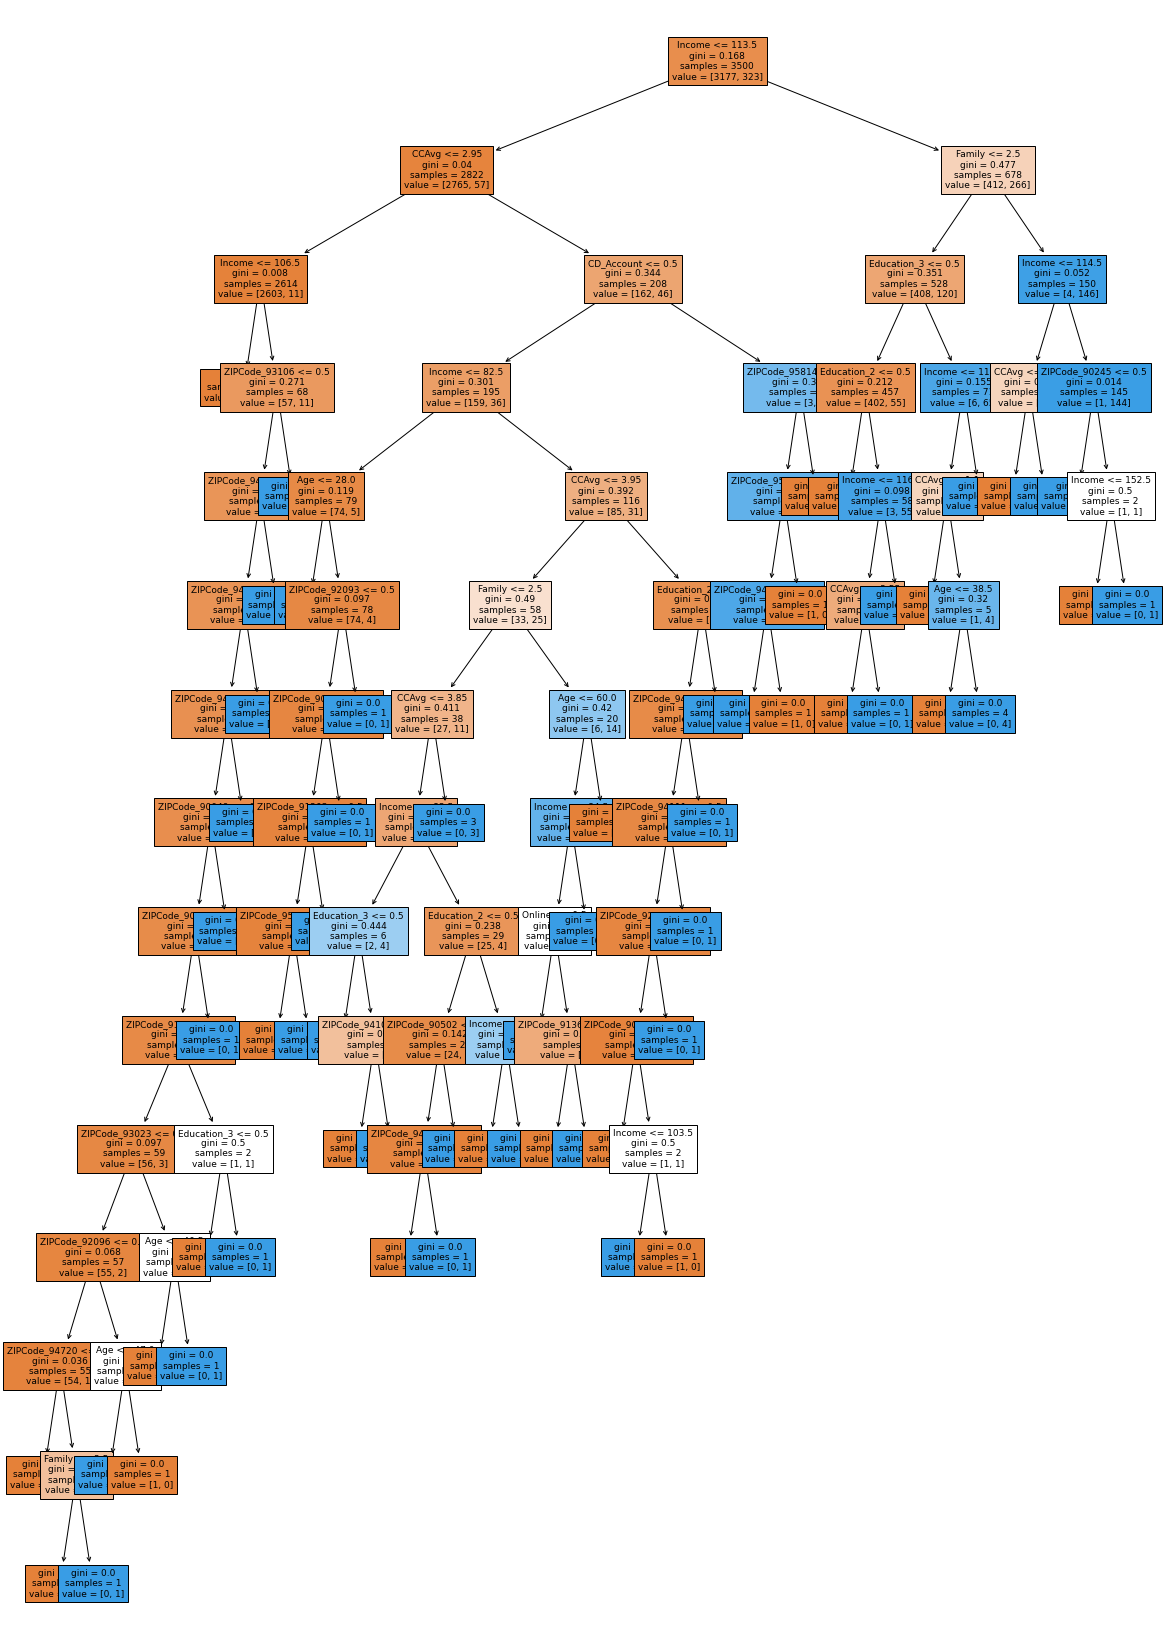

In [87]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feat,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
plt.show()

In [88]:
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                    Imp
Income         0.308010
Family         0.231570
Education_2    0.164181
Education_3    0.136499
CCAvg          0.059260
...                 ...
ZIPCode_92120  0.000000
ZIPCode_92116  0.000000
ZIPCode_92115  0.000000
ZIPCode_92110  0.000000
ZIPCode_93009  0.000000

[477 rows x 1 columns]


In [91]:
est = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

scor = make_scorer(recall_score)

grid_obj = GridSearchCV(est, parameters, scoring=scor, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
est = grid_obj.best_estimator_

# Fit the best algorithm to the data.
est.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=15, min_impurity_decrease=0.01, random_state=1,
                       splitter='random')

In [98]:
decision_tree_perf_test = model_performance_classification_sklearn(est, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.953333,0.942675,0.708134,0.808743


In [97]:
decision_tree_perf_train = model_performance_classification_sklearn(est, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.954,0.931889,0.684091,0.788991


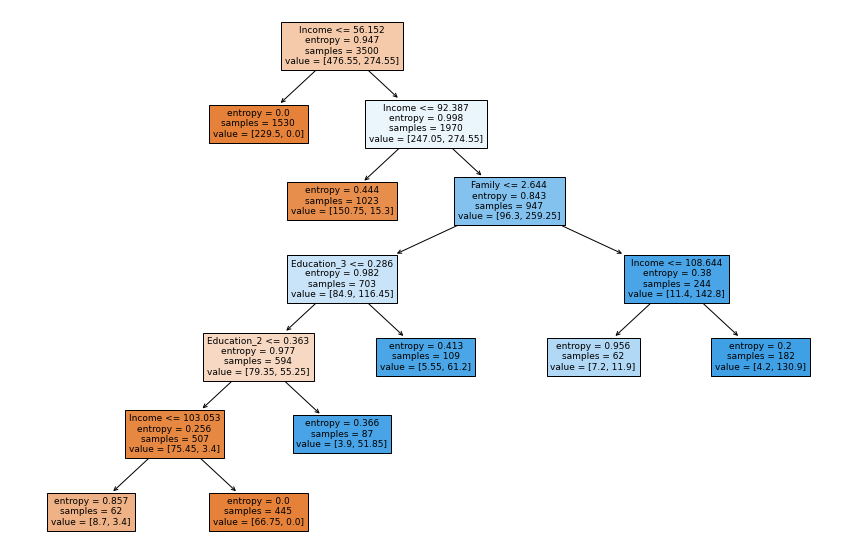

In [96]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    est,
    feature_names=feat,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
plt.show()

In [95]:
print(
    pd.DataFrame(
        est.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                    Imp
Income         0.676579
Education_2    0.170094
Family         0.080842
Education_3    0.072484
ZIPCode_96651  0.000000
...                 ...
ZIPCode_92084  0.000000
ZIPCode_92069  0.000000
ZIPCode_92068  0.000000
ZIPCode_92064  0.000000
ZIPCode_93009  0.000000

[477 rows x 1 columns]
